# Logistic Regression

In [ ]:
y = mx + c

s(y) = 1/ 1+ e**(-y)

s(mx + c) = 1/ 1+ e**(-(mx + c)) => 0 to 1

In [ ]:
  male         female
  0 - 0.5     0.5 - 1

## Insurance Prediction using Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance_data.csv")

df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


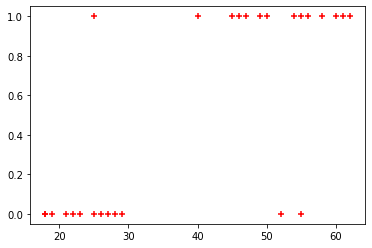

In [3]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df[['age']],
                                               df.bought_insurance,
                                               train_size=0.9)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(xtrain, ytrain)

LogisticRegression()

In [7]:
xtest

,age
24,50
3,52
11,28


In [8]:
ypredictions = model.predict(xtest)

ypredictions

array([1, 1, 0], dtype=int64)

In [9]:
model.predict_proba(xtest)

array([[0.10748428, 0.89251572],
       [0.08108033, 0.91891967],
       [0.78666634, 0.21333366]])

In [10]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(ytest,ypredictions)

0.6666666666666666

# Multi Class Classification

## Hand-written Digit Dataset

In [14]:
from sklearn.datasets import load_digits

digits = load_digits()

In [15]:
digits.data.shape

(1797, 64)

In [16]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
import numpy as np

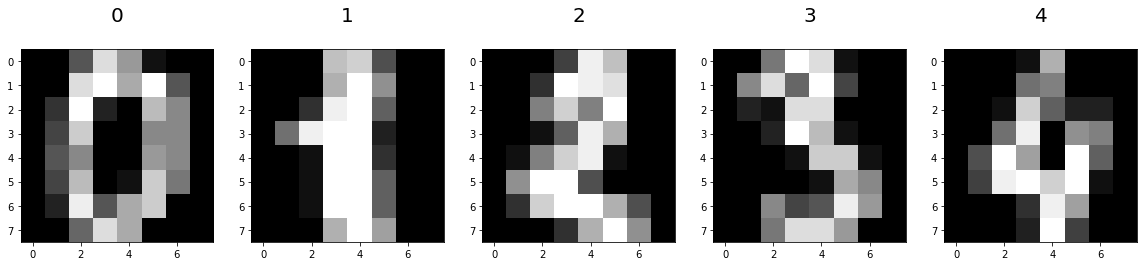

In [19]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i\n'%label, fontsize=20)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data,
                                               digits.target,
                                               train_size=0.75,
                                               random_state=101)

In [21]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

C:\Users\himan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.predict(xtest[0].reshape(1,-1))

array([7])

In [23]:
model.predict(xtest[0:10])

array([7, 4, 7, 9, 1, 7, 5, 7, 1, 0])

In [24]:
predictions = model.predict(xtest)

predictions.shape

(450,)

In [25]:
model.score(xtest, ytest)

0.9711111111111111

In [26]:
from sklearn.metrics import classification_report

print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.91      1.00      0.95        52
           2       1.00      0.97      0.99        36
           3       1.00      0.95      0.97        41
           4       1.00      0.94      0.97        53
           5       0.96      1.00      0.98        51
           6       1.00      0.95      0.97        39
           7       1.00      0.98      0.99        46
           8       0.98      0.94      0.96        49
           9       0.90      0.97      0.94        39

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [ ]:
0 - 0.1   0.1 - 0.2      0.2 - 0.3
  0           1              2

In [28]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest, predictions))

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  1 35  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  2  0  0  0  0]
 [ 0  1  0  0 50  0  0  0  0  2]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  1  0  0  0  0 37  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  2  0  0  0  0  0  0 46  1]
 [ 1  0  0  0  0  0  0  0  0 38]]


In [ ]:
gender	age	income	spending
M	25	100000	50000
M	30	150000	60000
F	32	165000	90000
F	21	200000	110000

In [30]:
df = pd.read_excel("spend.xlsx")

df

,gender,age,income,spending
0,M,24,50000,30000
1,F,25,100000,50000
2,M,27,1200000,600000
3,F,35,1500000,750000


<AxesSubplot:xlabel='spending', ylabel='count'>

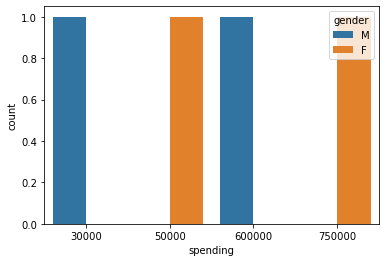

In [33]:
import seaborn as sns

sns.countplot(x = 'spending', hue='gender', data=df)

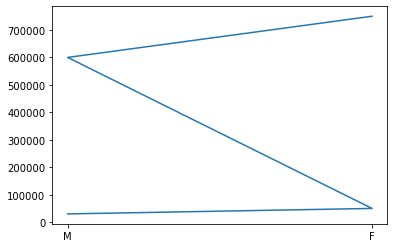

In [34]:
plt.plot(df['gender'], df['spending'], label='male')

<BarContainer object of 4 artists>

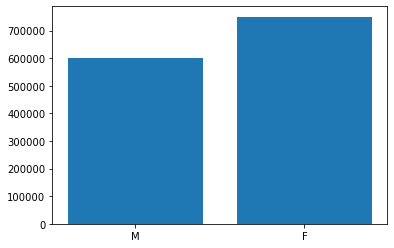

In [35]:
plt.bar(df['gender'], df['spending'])

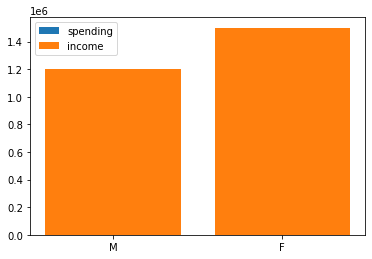

In [38]:
plt.bar(df['gender'], df['spending'], label='spending')
plt.bar(df['gender'], df['income'], label='income')

plt.legend()